In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv("/content/Algerian_forest_fires_cleaned_dataset.csv")


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [10]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [11]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

# **Independent and dependent features**

In [12]:
# fwi is our dependent features

df.head()

X=df.drop("FWI",axis=1)
y=df["FWI"]

In [13]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

# **Train,test,split**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

# **Multicollinearity**

<Axes: >

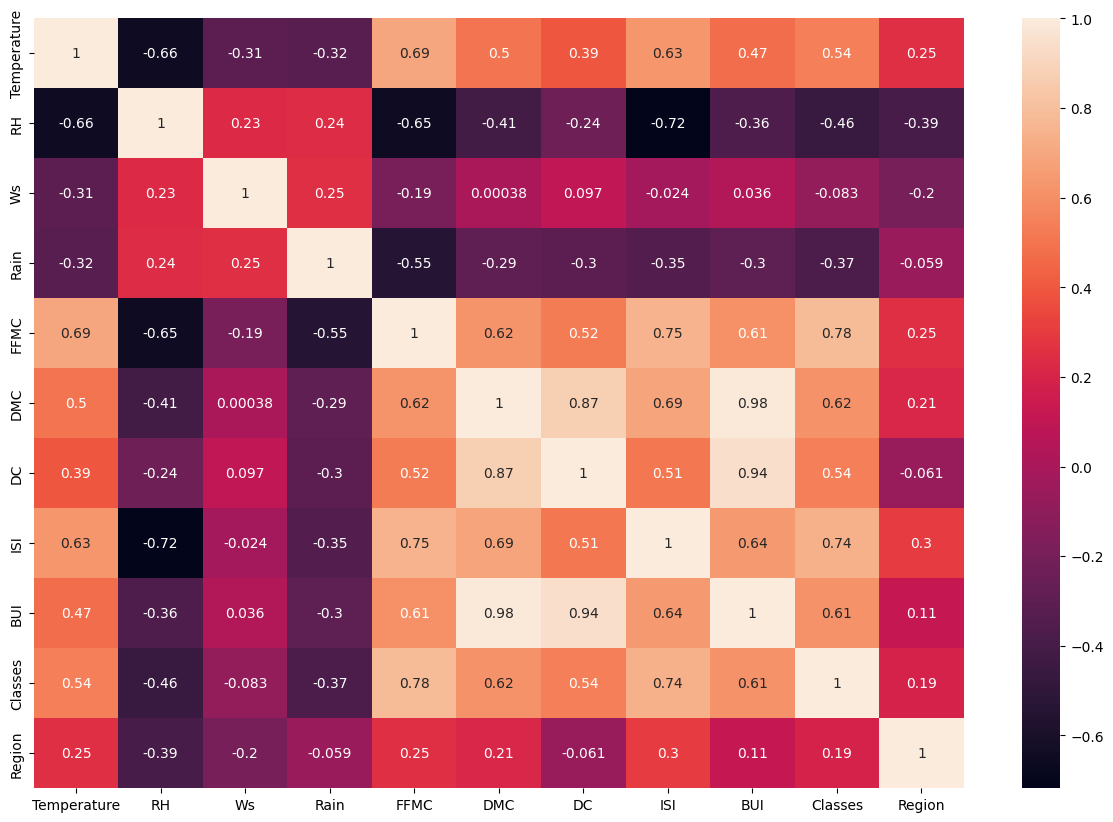

In [17]:
# Multicollinearity
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
X_train.corr()
# if 2 features are highly correlated ie if their value if 90 or 95% so we can say both behave in a similar fashion , so one can be dropped
# threshold decided by domain expert
# -0.65--65%

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [19]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [20]:
# threshold---domain expert

corr_features=correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
# drop features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [23]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [24]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [25]:
# Standard scaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<ipython-input-27-df963b1f8964>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

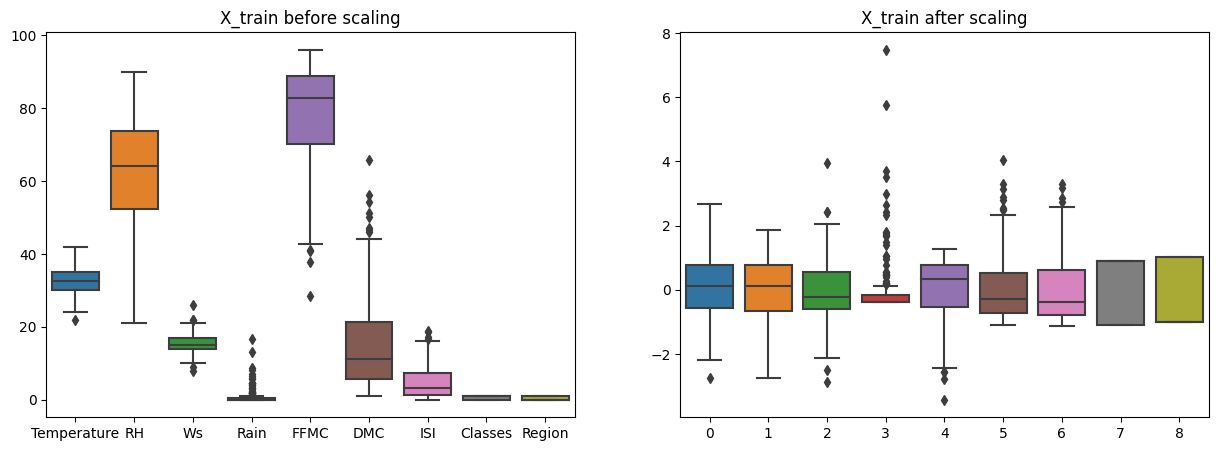

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')
# the first boxplot comes very varied.



# **Linear** regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


In [29]:
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [30]:
regressor.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

In [31]:
regressor.intercept_

7.156043956043957

In [32]:
y_pred_test=regressor.predict(X_test_scaled)

In [33]:
mae=mean_absolute_error(y_test,y_pred_test)
print(mae)

0.5468236465249986


In [34]:
score=r2_score(y_test,y_pred_test)
score
# 98% accuracy

0.9847657384266951

In [35]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64

In [36]:
y_pred_test

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

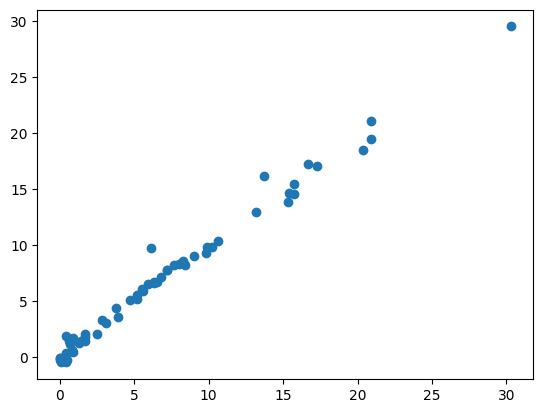

In [37]:
plt.scatter(y_test,y_pred_test)
# its a very linear graph means good model


In [38]:
y_test.shape

(61,)

In [39]:
y_pred_test.shape

(61,)

# **Lasso Regressinon**

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [41]:
lasso=Lasso()

In [42]:
lasso.fit(X_train_scaled,y_train)

Lasso()

In [43]:
y_pred_testl=lasso.predict(X_test_scaled)

In [44]:
mae=mean_absolute_error(y_test,y_pred_testl)
mae

1.133175994914409

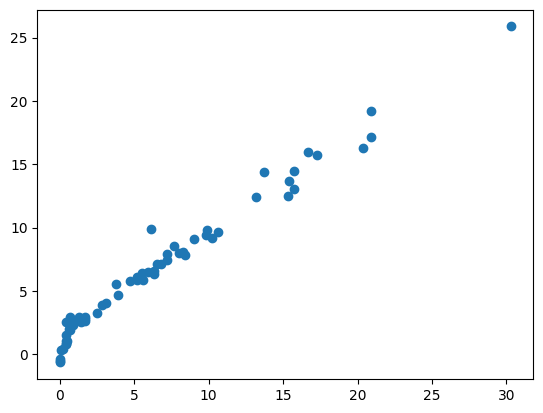

In [55]:
plt.scatter(y_test,y_pred_testl)

In [45]:
score=r2_score(y_test,y_pred_testl)
print(f"The model accuracy is {score*100}%")

The model accuracy is 94.92020263112389%


# Ridge **regression**

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

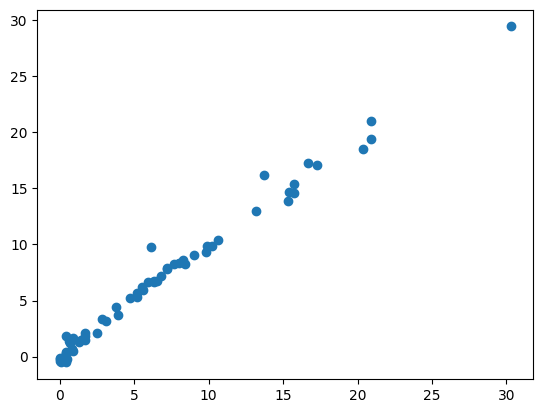

In [53]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_testr=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred_testr)

In [48]:
# Accuracy

score=r2_score(y_test,y_pred_testr)
score

0.9842993364555513

# **RidgeCrossvalidation**

In [50]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [51]:
ridgecv=RidgeCV(5)
ridgecv.fit(X_train_scaled,y_train)
y_pred_testrcv=ridgecv.predict(X_test_scaled)


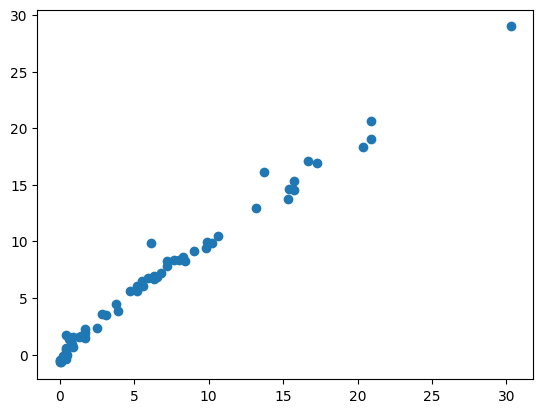

In [52]:
plt.scatter(y_test,y_pred_testrcv)

In [56]:
score=r2_score(y_test,y_pred_testr)
score
# for bigger dataset we can take cv=10

0.9842993364555513

# **Elastic regression**

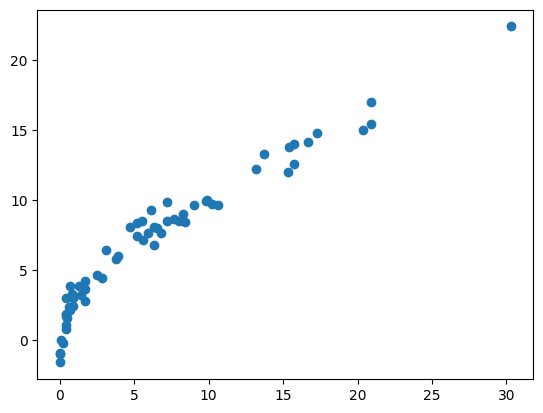

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred_teste = elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred_teste)




In [60]:
score=r2_score(y_test,y_pred_teste)
score

# accuracy less than ridge and lasso 

0.8753460589519703

# **Pickle**

In [61]:
# Ridge is having highest accuracy ie 98.4 so we will pickle it
# and use it while deploying

scaler

StandardScaler()

In [62]:
ridge

Ridge()

In [63]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))